In [1]:
import pandas as pd

df1 = pd.read_csv("retail_sales_dataset.csv")
df2 = pd.read_csv("Warehouse_and_Retail_Sales.csv")
df2['Product Category'] = df2['ITEM TYPE']


In [2]:
# For df2: make a Date from YEAR & MONTH
df2['Date'] = pd.to_datetime(
    df2['YEAR'].astype(str) + "-" +
    df2['MONTH'].astype(str).str.zfill(2) + "-01"
)
# For df1, we’ll parse its Date later


In [3]:
df = pd.concat([df1, df2], ignore_index=True)
# Parse df1’s Date and unify
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
# Make sure sales are numbers
df['WAREHOUSE SALES'] = pd.to_numeric(df['WAREHOUSE SALES'], errors='coerce').fillna(0)
df['RETAIL SALES']    = pd.to_numeric(df['RETAIL SALES'],    errors='coerce').fillna(0)


In [4]:
df.info()        # row count, columns, dtypes, missing
df.describe()    # stats for numeric cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308645 entries, 0 to 308644
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Transaction ID    1000 non-null    float64       
 1   Date              308645 non-null  datetime64[ns]
 2   Customer ID       1000 non-null    object        
 3   Gender            1000 non-null    object        
 4   Age               1000 non-null    float64       
 5   Product Category  308644 non-null  object        
 6   Quantity          1000 non-null    float64       
 7   Price per Unit    1000 non-null    float64       
 8   Total Amount      1000 non-null    float64       
 9   YEAR              307645 non-null  float64       
 10  MONTH             307645 non-null  float64       
 11  SUPPLIER          307478 non-null  object        
 12  ITEM CODE         307645 non-null  object        
 13  ITEM DESCRIPTION  307645 non-null  object        
 14  ITEM

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,1000.000000,308645,1000.00000,1000.000000,1000.000000,1000.000000,307645.000000,307645.000000,308645.000000,307645.000000,308645.000000
mean,500.500000,2018-11-26 21:25:58.283464704,41.39200,2.514000,179.890000,456.000000,2018.438525,6.423862,7.001245,6.936465,25.212643
min,1.000000,2017-06-01 00:00:00,18.00000,1.000000,25.000000,25.000000,2017.000000,1.000000,-6.490000,-38.490000,-7800.000000
25%,250.750000,2017-11-01 00:00:00,29.00000,1.000000,30.000000,60.000000,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,500.500000,2019-03-01 00:00:00,42.00000,3.000000,50.000000,135.000000,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,750.250000,2019-09-01 00:00:00,53.00000,4.000000,300.000000,900.000000,2019.000000,9.000000,3.250000,3.000000,5.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000,2020.000000,12.000000,2739.000000,1990.830000,18317.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632,1.083061,3.461812,30.938432,30.237195,249.515748


In [5]:
# 1. Remove negative values if you want only clean sales
df = df[df['WAREHOUSE SALES'] >= 0]
df = df[df['RETAIL SALES'] >= 0]

# 2. Fix any extreme outliers (if needed — optional)
df = df[df['WAREHOUSE SALES'] <= 10000]  # remove mega spikes if not realistic


In [6]:
# Top 5 by warehouse
top5_wh = df.groupby('Product Category')['WAREHOUSE SALES'].sum().nlargest(5)
print(top5_wh)

# Top 5 by retail
top5_rt = df.groupby('Product Category')['RETAIL SALES'].sum().nlargest(5)
print(top5_rt)


Product Category
BEER           6102989.39
WINE           1157360.28
KEGS            118623.00
LIQUOR           95001.19
NON-ALCOHOL      26159.26
Name: WAREHOUSE SALES, dtype: float64
Product Category
LIQUOR          802404.26
WINE            746265.78
BEER            549104.02
NON-ALCOHOL      34075.06
STR_SUPPLIES      2740.88
Name: RETAIL SALES, dtype: float64


In [8]:
# Recreate YearMonth (just in case it got lost or wasn’t added yet)
df['YearMonth'] = df['Date'].dt.to_period('M')


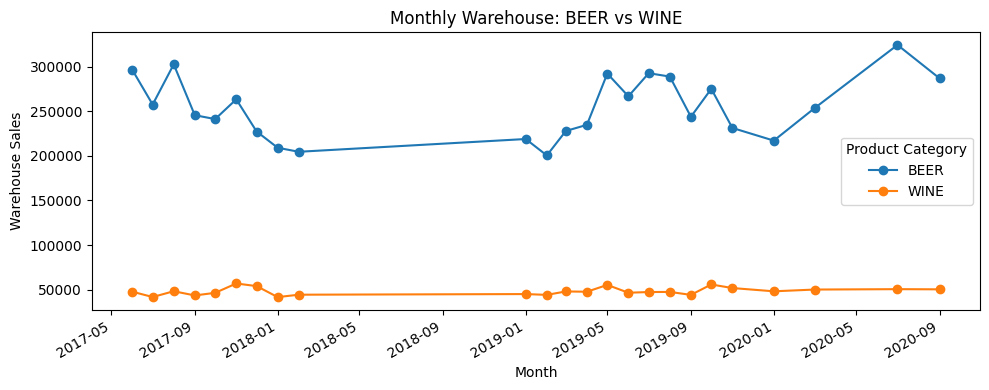

In [12]:
import matplotlib.pyplot as plt  # ← add this line if not done earlier

# Create YearMonth column (if not done yet)
df['YearMonth'] = df['Date'].dt.to_period('M')

# Time-series: BEER & WINE
ts = (
    df[df['Product Category'].isin(['BEER', 'WINE'])]
    .groupby(['YearMonth', 'Product Category'])
    .agg({'WAREHOUSE SALES': 'sum', 'RETAIL SALES': 'sum'})
    .reset_index()
)

# Pivot and convert for plotting
pivot_wh = ts.pivot(index='YearMonth', columns='Product Category', values='WAREHOUSE SALES').to_timestamp()

# Plot the time-series
pivot_wh.plot(figsize=(10, 4), marker='o', title="Monthly Warehouse: BEER vs WINE")
plt.ylabel("Warehouse Sales")
plt.xlabel("Month")
plt.tight_layout()
plt.show()


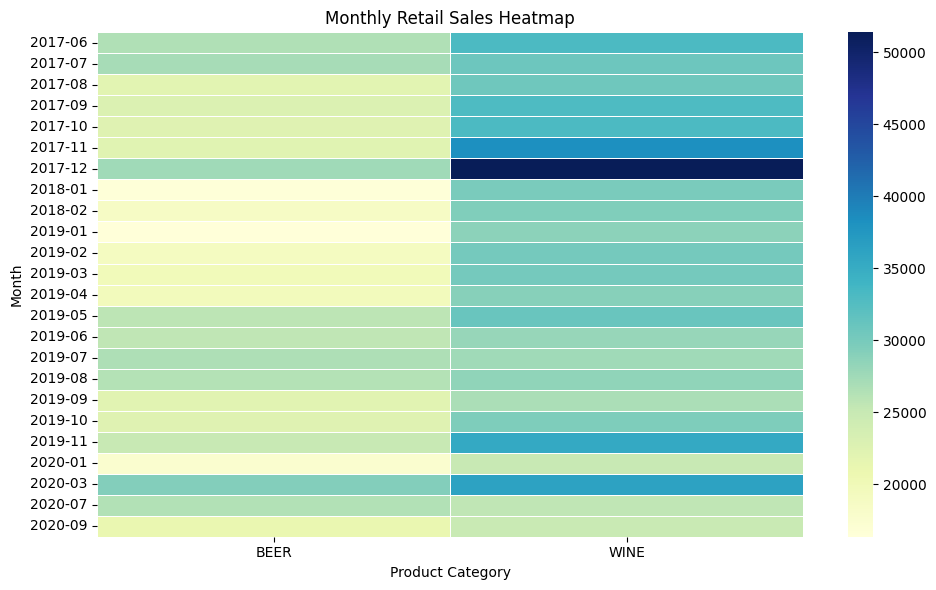

In [11]:

heat = ts.pivot(index='YearMonth', columns='Product Category', values='RETAIL SALES')

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(heat, cmap='YlGnBu', linewidths=0.5)
plt.title("Monthly Retail Sales Heatmap")
plt.xlabel("Product Category")
plt.ylabel("Month")
plt.tight_layout()
plt.show()
